In [123]:
import cv2 
import PIL
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split

In [124]:
# Here we split data into training and testing data set and then later convert into grayscale images to simplify things

In [125]:

import pandas as pd
dataset=pd.read_csv('/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33-labels.csv')

In [127]:
dataset_2['Label'].value_counts()

8    9106
0    1125
4    1062
2    1031
5    1009
Name: Label, dtype: int64

In [128]:
#making sure that each class is divided in the ratio 80:20 for train:test respectively
"""
Reference: -
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""

train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[["Label"]]) 

In [129]:
#train is the dataset with stratified sample without negative class and needs to be cross validated
train['Label'].value_counts()

0    900
4    849
2    825
5    807
Name: Label, dtype: int64

In [130]:
test['Label'].value_counts()

0    225
4    213
2    206
5    202
Name: Label, dtype: int64

# Converting the train data into grey scale pixel intensity histograms

In [156]:
"""
Reference: -"https://kapernikov.com/tutorial-image-classification-with-scikit-learn/"




The code in the above reference has been modified and written as shown to read an image with its path specified
"""

'\nReference: -"https://kapernikov.com/tutorial-image-classification-with-scikit-learn/"\n\n\n\n\nThe code in the above reference has been modified and written as shown to read an image with its path specified\n'

In [131]:
import cv2
import os

dataset_folder = "/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33"

# Assuming this is a classification task and
# your dataset has multiple classes
folders = train['Filename']
images = []
image_shapes = []
hsitr=[]
for folder in folders:
#     print(folder,"folder anme")
    image_path = os.path.join(dataset_folder, folder)
#     print(image_path)
    if image_path!="/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33/.DS_Store":
        
        image = cv2.imread(image_path)
        # Convert to RGB as OpenCV uses BGR
        gray_images=(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
        images.append(gray_images)
        hsitr.append(cv2.calcHist([images[-1]],[0],None,[256],[0,256]))

In [132]:
X_train_svm=hsitr
y_train_svm=train['Label']
X_train_rf=hsitr
y_train_rf=train['Label']
X_train_nn=hsitr
y_train_nn=train['Label']

In [133]:
import numpy as np
X_train_svm=np.array(X_train_svm)
y_train_svm=np.array(y_train_svm)

X_train_rf=np.array(X_train_rf)
y_train_rf=np.array(y_train_rf)

X_train_nn=np.array(X_train_nn)
y_train_nn=np.array(y_train_nn)

In [134]:
X_train_svm=X_train_svm.reshape([3381,256])

X_train_rf=X_train_rf.reshape([3381,256])

X_train_nn=X_train_nn.reshape([3381,256])

# Converting the test data into grey scale pixel intensity histograms

In [135]:
#Converting the test data into required format 
dataset_folder = "/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33"

# Assuming this is a classification task and
# your dataset has multiple classes
folders_test = test['Filename']
images_test = []
image_shapes_test = []
hsitr_test=[]
for folder in folders_test:
#     print(folder,"folder anme")
    image_path = os.path.join(dataset_folder, folder)
#     print(image_path)
    if image_path!="/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33/.DS_Store":
        image = cv2.imread(image_path)
        # Convert to RGB as OpenCV uses BGR
        gray_images=(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
        images_test.append(gray_images)
        hsitr_test.append(cv2.calcHist([images_test[-1]],[0],None,[256],[0,256]))
X_test=hsitr_test
y_test=test['Label']
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test=X_test.reshape([846,256])

In [136]:
X_test_nn=X_test
X_test_rf=X_test
X_test_svm=X_test
y_test_nn=y_test
y_test_rf=y_test
y_test_svm=y_test

# k fold cross validation

In [157]:
"""
References: -"https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/"

This code has been used for plotting the confusion matrices of the three models below
"""


'\nReferences: -"https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/"\n'

# SVM

In [ ]:
"""
reference-"https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/"

From the above reference, the kernel used is gaussian with radial basis method to improve transformation
"""

In [137]:
#SVM
# import k-folder
# reference-"https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/"
scores_svm=[]
validation_accuracy_svm=[]
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# use the same model as before
svc=SVC(kernel='rbf', C=10)
cross_validation_score_svm=cross_val_score(svc, X_train_svm, y_train_svm, cv=5, scoring='accuracy')
print(cross_validation_score_svm, "cross_validation_score")
validation_accuracy_svm.append(sum(cross_validation_score_svm)/5)

[0.74741507 0.75887574 0.74260355 0.73224852 0.71153846] cross_validation_score


In [138]:
validation_accuracy_svm

[0.7385362677318137]

In [139]:
svc.fit(X_train_svm, y_train_svm)
y_pred_svm = svc.predict(X_test_svm)

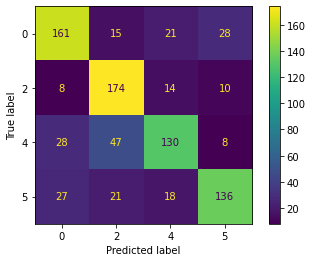

array([[161,  15,  21,  28],
       [  8, 174,  14,  10],
       [ 28,  47, 130,   8],
       [ 27,  21,  18, 136]])

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf.classes_)
disp.plot()
plt.show()
cm_svm

In [141]:
from sklearn.metrics import classification_report

In [142]:
len(clf.classes_)

4

# Random Forest

In [144]:

from sklearn.ensemble import RandomForestClassifier
# import k-folder
# reference-"https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/"
scores_svm=[]
validation_accuracy_rf=[]
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# use the same model as before
clf=RandomForestClassifier()
cross_validation_score=cross_val_score(clf, X_train_rf, y_train_rf, cv=5, scoring='accuracy')
print(cross_validation_score, "cross_validation_score")
validation_accuracy_rf.append(sum(cross_validation_score)/5)

[0.73264402 0.71893491 0.73372781 0.70857988 0.67307692] cross_validation_score


In [145]:
validation_accuracy_rf

[0.7133927088704954]

In [146]:
clf.fit(X_train_rf, y_train_rf)
y_pred_rf = clf.predict(X_test_rf)

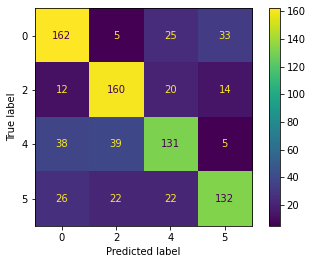

In [147]:
cm_rf = confusion_matrix(y_test_rf, y_pred_rf, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=clf.classes_)
disp.plot()
plt.show()

# Neural network

In [149]:
from sklearn.neural_network import MLPClassifier
scores_nn=[]
validation_accuracy_nn=[]
clf1 = MLPClassifier(learning_rate='adaptive')
cross_validation_score_nn=cross_val_score(clf1, X_train_rf, y_train_rf, cv=5, scoring='accuracy')
print(cross_validation_score, "cross_validation_score")
validation_accuracy_nn.append(sum(cross_validation_score_nn)/5)

[0.73264402 0.71893491 0.73372781 0.70857988 0.67307692] cross_validation_score


In [150]:
validation_accuracy_nn

[0.6220023074300998]

In [151]:
clf1.fit(X_train_nn, y_train_nn)
y_pred_nn = clf1.predict(X_test_nn)

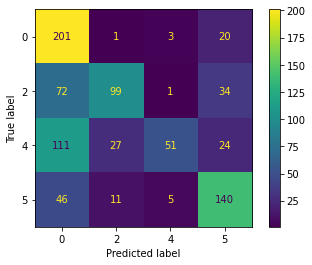

In [152]:
cm_nn = confusion_matrix(y_test_nn, y_pred_nn, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=clf1.classes_)
disp.plot()
plt.show()

In [ ]:
"""
References: -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
"""

In [153]:
print("neural network")
print(classification_report(y_test_nn, y_pred_nn, target_names=["class 0","class 2","class 4","class 5"]))

print("Random forest")
print(classification_report(y_test_rf, y_pred_rf, target_names=["class 0","class 2","class 4","class 5"]))

print("svm")

print(classification_report(y_test_svm, y_pred_svm, target_names=["class 0","class 2","class 4","class 5"]))

neural network
              precision    recall  f1-score   support

     class 0       0.47      0.89      0.61       225
     class 2       0.72      0.48      0.58       206
     class 4       0.85      0.24      0.37       213
     class 5       0.64      0.69      0.67       202

    accuracy                           0.58       846
   macro avg       0.67      0.58      0.56       846
weighted avg       0.67      0.58      0.56       846

Random forest
              precision    recall  f1-score   support

     class 0       0.68      0.72      0.70       225
     class 2       0.71      0.78      0.74       206
     class 4       0.66      0.62      0.64       213
     class 5       0.72      0.65      0.68       202

    accuracy                           0.69       846
   macro avg       0.69      0.69      0.69       846
weighted avg       0.69      0.69      0.69       846

svm
              precision    recall  f1-score   support

     class 0       0.72      0.72      0.7

In [158]:
#From the confusion matrix, since the accuracy of svm is highest, it is the better model of the 3.

# Validation accuracies

In [154]:
print(validation_accuracy_nn)
print(validation_accuracy_rf)
print(validation_accuracy_svm)

[0.6220023074300998]
[0.7133927088704954]
[0.7385362677318137]


In [159]:
#Based on the validation accuracy, the validation accuracy is highest for svm model so that is the better model of the 3.